In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from os import listdir

from Algorithms.Functions.DE import DE
from Algorithms.Functions.PSO import PSO

from sklearn.model_selection import train_test_split 

path = "."
lab_name = "Lab7"
if lab_name in listdir(path):
    path += "/" + lab_name
    if "Data" in listdir(path):
        path += "/Data"
        datas_path = [path + "/" + data for data in listdir(path)]
    else:
        raise Exception(f"Data directory in {lab_name} directory not found")
else:
    raise Exception(f"{lab_name} directory not found")



In [2]:
data1_path = datas_path[1]
data2_path = datas_path[0]
data1 = pd.read_excel(data1_path, sheet_name="Var10")
data2 = pd.read_excel(data2_path, sheet_name="boston_housing")
dat1 = data1.to_numpy()
dat2 = data2.to_numpy()
train1, test1 = train_test_split(dat1, test_size=0.25)
train2, test2 = train_test_split(dat2, test_size=0.25)

In [3]:
x1_train, y1_train = train1[:, :-1], train1[:, -1]
x2_train, y2_train = train2[:, :-1], train2[:, -1]

x1_test, y1_test = test1[:, :-1], test1[:, -1]
x2_test, y2_test = test2[:, :-1], test2[:, -1]

In [4]:
x1_train_ones = np.ones((x1_train.shape[0], 1))
x1_test_ones = np.ones((x1_test.shape[0], 1))
x2_train_ones = np.ones((x2_train.shape[0], 1))
x2_test_ones = np.ones((x2_test.shape[0], 1))

x1_train = np.concatenate((x1_train_ones, x1_train), axis=1)
x1_test = np.concatenate((x1_test_ones, x1_test), axis=1)
x2_train = np.concatenate((x2_train_ones, x2_train), axis=1)
x2_test = np.concatenate((x2_test_ones, x2_test), axis=1)

In [5]:
def error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [6]:
def func(A, X, Y):
    return np.mean((Y - X @ A)**2)

In [7]:
iterations = 1000
lambda_1 = 55
lambda_2 = 10

Processing: 100%|████████████████████████████████████████| 1000/1000 [00:06<00:00, 155.76step/s]


Error DE:  0.0007728959481144309
Error PSO:  0.0014456071209324104
Error Analytic:  0.0007732567339581479


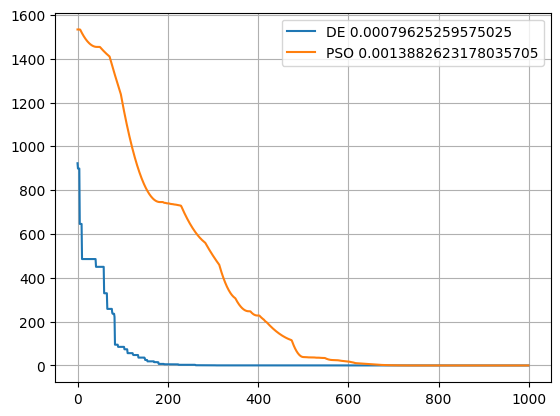

In [8]:
a = np.linalg.inv(x1_train.T @ x1_train) @ x1_train.T @ y1_train

de = DE(100, iterations, func, [[-1e2, 1e2]] * 10, parameters_to_pass=(x1_train, y1_train), more=True, plot=False, static=True)
pso = PSO(100, iterations, [0, 4], [-.15, .15], func, [[-1e2, 1e2]] * 10, parameters_to_pass=(x1_train, y1_train), more=True, plot=False, static=True)
print("Error DE: ", error(y1_test, x1_test @ de[1]))
print("Error PSO: ", error(y1_test, x1_test @ pso[1]))
print("Error Analytic: ", error(y1_test, x1_test @ a))


plt.plot(de[-2], label=f"DE {de[0]}")
plt.plot(pso[-2], label=f"PSO {pso[0]}")
plt.legend()
plt.grid()
plt.show()

Processing: 100%|████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.14step/s]

Error DE:  439.1941447413679
Error PSO:  317.8430268679743
Error Analytic:  3.445712543591058e+29


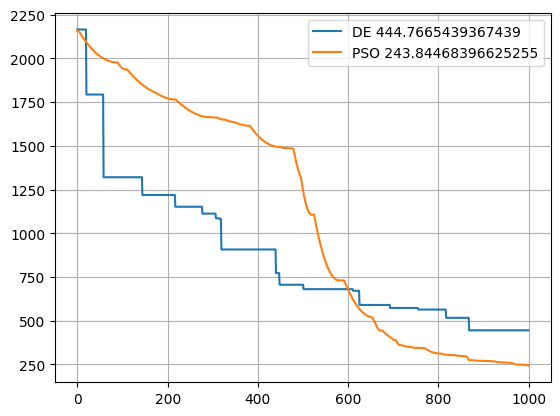

In [9]:
a = np.linalg.inv(x2_train.T @ x2_train) @ x2_train.T @ y2_train

de = DE(100, iterations, func, [[-1e2, 1e2]] * 105, parameters_to_pass=(x2_train, y2_train), more=True, plot=False, static=True)
pso = PSO(100, iterations, [0, 4], [-.15, .15], func, [[-1e2, 1e2]] * 105, parameters_to_pass=(x2_train, y2_train), more=True, plot=False, static=True)
print("Error DE: ", error(y2_test, x2_test @ de[1]))
print("Error PSO: ", error(y2_test, x2_test @ pso[1]))
print("Error Analytic: ", error(y2_test, x2_test @ a))


plt.plot(de[-2], label=f"DE {de[0]}")
plt.plot(pso[-2], label=f"PSO {pso[0]}")
plt.legend()
plt.grid()
plt.show()

In [10]:
def L2_reg(A, X, Y, lambda_):
    return np.mean((Y - X @ A)**2) + lambda_ * np.mean(A**2)

Processing: 100%|████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.00step/s]


Error DE:  9.179897397700252
Error PSO:  9.161454351406201
Error Analytic:  2.8138581204085447


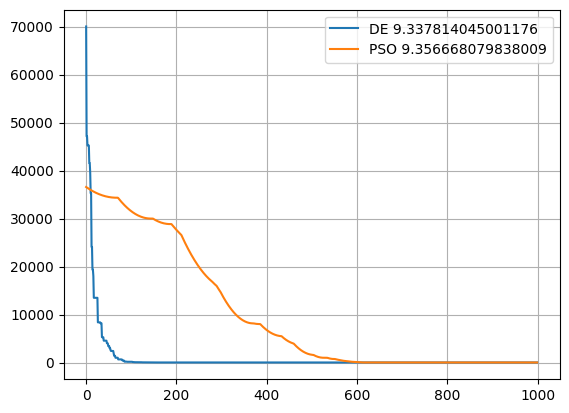

In [11]:
a = np.linalg.inv(x1_train.T @ x1_train + lambda_1 * np.eye(x1_train.shape[1])) @ x1_train.T @ y1_train
de = DE(100, iterations, L2_reg, [[-1e2, 1e2]] * 10, parameters_to_pass=(x1_train, y1_train, lambda_1), more=True, plot=False, static=True)
pso = PSO(100, iterations, [0, 4], [-.15, .15], L2_reg, [[-1e2, 1e2]] * 10, parameters_to_pass=(x1_train, y1_train, lambda_1), more=True, plot=False, static=True)
print("Error DE: ", error(y1_test, x1_test @ de[1]))
print("Error PSO: ", error(y1_test, x1_test @ pso[1]))
print("Error Analytic: ", error(y1_test, x1_test @ a))

plt.plot(de[-2], label=f"DE {de[0]}")
plt.plot(pso[-2], label=f"PSO {pso[0]}")
plt.legend()
plt.grid()
plt.show()

Processing: 100%|████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.83step/s]


Error DE:  87.76010683807188
Error PSO:  62.231976126086934
Error Analytic:  36.482213324091234


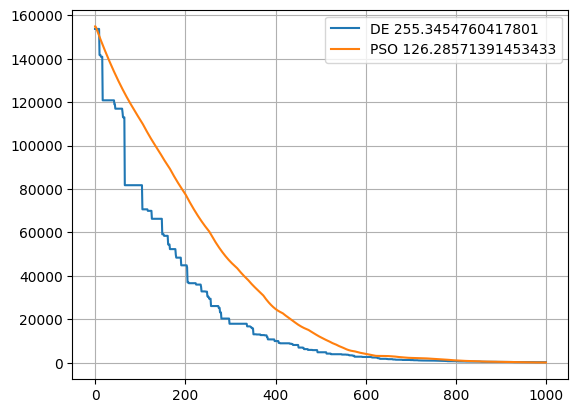

In [12]:
a = np.linalg.inv(x2_train.T @ x2_train + lambda_1 * np.eye(x2_train.shape[1])) @ x2_train.T @ y2_train

de = DE(100, iterations, L2_reg, [[-1e2, 1e2]] * 105, parameters_to_pass=(x2_train, y2_train, lambda_1), more=True, plot=False, static=True)
pso = PSO(100, iterations, [0, 4], [-.15, .15], L2_reg, [[-1e2, 1e2]] * 105, parameters_to_pass=(x2_train, y2_train, lambda_1), more=True, plot=False, static=True)
print("Error DE: ", error(y2_test, x2_test @ de[1]))
print("Error PSO: ", error(y2_test, x2_test @ pso[1]))
print("Error Analytic: ", error(y2_test, x2_test @ a))

plt.plot(de[-2], label=f"DE {de[0]}")
plt.plot(pso[-2], label=f"PSO {pso[0]}")
plt.legend()
plt.grid()
plt.show()

In [13]:
def L1_reg(A, X, Y, lambda_):
    return np.mean((Y - X @ A)**2) + lambda_ * np.mean(np.abs(A))

Processing: 100%|████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.95step/s]


Error DE:  8.234869562422372
Error PSO:  8.069099101803184


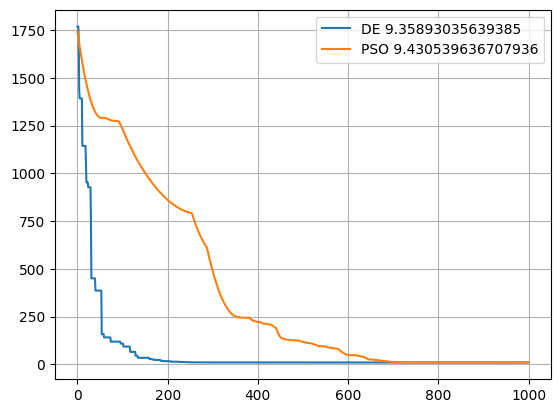

In [14]:
de = DE(100, iterations, L1_reg, [[-1e2, 1e2]] * 10, parameters_to_pass=(x1_train, y1_train, lambda_2), more=True, plot=False, static=True)
pso = PSO(100, iterations, [0, 4], [-.15, .15], L1_reg, [[-1e2, 1e2]] * 10, parameters_to_pass=(x1_train, y1_train, lambda_2), more=True, plot=False, static=True)
print("Error DE: ", error(y1_test, x1_test @ de[1]))
print("Error PSO: ", error(y1_test, x1_test @ pso[1]))

plt.plot(de[-2], label=f"DE {de[0]}")
plt.plot(pso[-2], label=f"PSO {pso[0]}")
plt.legend()
plt.grid()
plt.show()

Processing: 100%|████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.90step/s]

Error DE:  181.63548037980448
Error PSO:  112.39555029003894


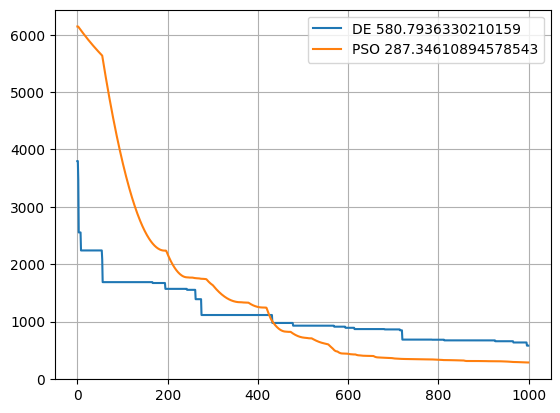

In [15]:
de = DE(100, iterations, L1_reg, [[-1e2, 1e2]] * 105, parameters_to_pass=(x2_train, y2_train, lambda_2), more=True, plot=False, static=True)
pso = PSO(100, iterations, [0, 4], [-.15, .15], L1_reg, [[-1e2, 1e2]] * 105, parameters_to_pass=(x2_train, y2_train, lambda_2), more=True, plot=False, static=True)
print("Error DE: ", error(y2_test, x2_test @ de[1]))
print("Error PSO: ", error(y2_test, x2_test @ pso[1]))

plt.plot(de[-2], label=f"DE {de[0]}")
plt.plot(pso[-2], label=f"PSO {pso[0]}")
plt.legend()
plt.grid()
plt.show()

In [16]:
def elastic(A, X, Y, lambda_1, lambda_2):
    return np.mean((Y - X @ A)**2) + lambda_1 * np.mean(A**2) + lambda_2 * np.mean(np.abs(A))

Processing: 100%|████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.05step/s]


Error DE:  9.646450731546013
Error PSO:  9.633239947015293


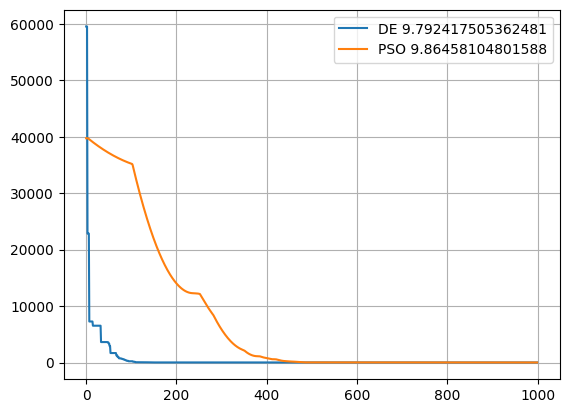

In [17]:
de = DE(100, iterations, elastic, [[-1e2, 1e2]] * 10, parameters_to_pass=(x1_train, y1_train, lambda_1, lambda_2), more=True, plot=False, static=True)
pso = PSO(100, iterations, [0, 4], [-.15, .15], elastic, [[-1e2, 1e2]] * 10, parameters_to_pass=(x1_train, y1_train, lambda_1, lambda_2), more=True, plot=False, static=True)
print("Error DE: ", error(y1_test, x1_test @ de[1]))
print("Error PSO: ", error(y1_test, x1_test @ pso[1]))

plt.plot(de[-2], label=f"DE {de[0]}")
plt.plot(pso[-2], label=f"PSO {pso[0]}")
plt.legend()
plt.grid()
plt.show()


Processing:   0%|                                        | 0/1000 [00:00<?, ?step/s]

Processing: 100%|████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.11step/s]


Error DE:  63.859974187626115
Error PSO:  66.94556062685203


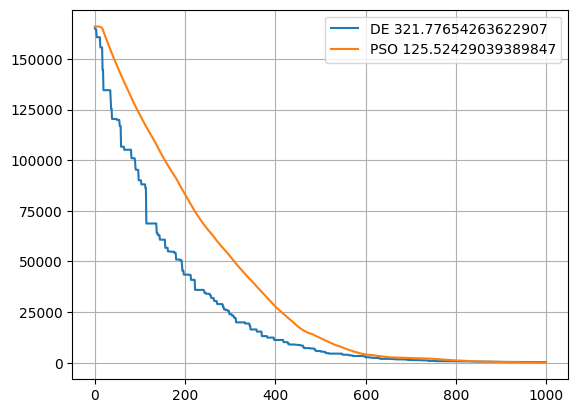

In [18]:
de = DE(100, iterations, elastic, [[-1e2, 1e2]] * 105, parameters_to_pass=(x2_train, y2_train, lambda_1, lambda_2), more=True, plot=False, static=True)
pso = PSO(100, iterations, [0, 4], [-.15, .15], elastic, [[-1e2, 1e2]] * 105, parameters_to_pass=(x2_train, y2_train, lambda_1, lambda_2), more=True, plot=False, static=True)
print("Error DE: ", error(y2_test, x2_test @ de[1]))
print("Error PSO: ", error(y2_test, x2_test @ pso[1]))

plt.plot(de[-2], label=f"DE {de[0]}")
plt.plot(pso[-2], label=f"PSO {pso[0]}")
plt.legend()
plt.grid()
plt.show()
